# Chapter 15: Keys and KeySignatures

the ***KeySignature*** object : handles the spelling of key signatures 

the ***Key*** object : knows more advanced aspects of tonal harmony

In [1]:
from music21 import *

let’s get a couple of different key signatures, representing different numbers of sharps

In [2]:
ks2 = key.KeySignature(2)
ks2.sharps

2

In [3]:
ks7 = key.KeySignature(7)
ks7

<music21.key.KeySignature of 7 sharps>

get a list of which pitches are altered by the key signature

In [4]:
ks2.alteredPitches

[<music21.pitch.Pitch F#>, <music21.pitch.Pitch C#>]

In [5]:
ks2.show('xml')

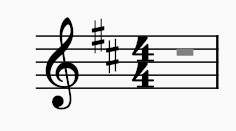

see what the accidental(临时升降记号) is for any given step

In [5]:
ks2.accidentalByStep('C')

<music21.pitch.Accidental sharp>

In [6]:
ks2.accidentalByStep('E') is None

True

Key Signatures transpose

In [7]:
ks4 = ks2.transpose('M2')
ks4

<music21.key.KeySignature of 4 sharps>

In [8]:
ks4.sharps = 0
ks4

<music21.key.KeySignature of no sharps or flats>

get the Major or Minor scale corresponding to the Key Signature

In [9]:
ks2.getScale('major')

<music21.scale.MajorScale D major>

In [10]:
ks2.getScale('minor')

<music21.scale.MinorScale B minor>

put a KeySignature into a Stream

In [11]:
m = stream.Measure()
m.insert(0, meter.TimeSignature('3/4'))
m.insert(0, ks2)
d = note.Note('D')
c = note.Note('C')
fis = note.Note('F#') # German name
m.append([d, c, fis])
m.show('xml')

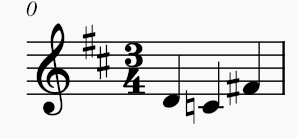

Note that the Note ‘C’ is treated as C-natural and thus needs the natural sign(还原记号) in front of it

The Note F# however does not need a natural sign to be displayed

In [12]:
# we can also set the KeySignature for the beginning of the measure
m.keySignature = key.KeySignature(4)
m.show('xml')

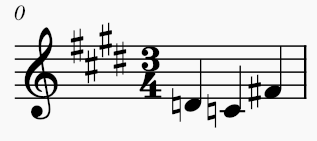

Of course life isn’t all about sharps; it’d be a pretty terrible KeySignature object if we couldn’t have flats

just specify the number of flats as a **negative** number

In [13]:
# So -1 = one flat, -2 = two flats, or multiply a positive number by -1
eroicaFlats = 3
ksEroica = key.KeySignature(-1 * eroicaFlats)
ksEroica

<music21.key.KeySignature of 3 flats>

In [14]:
ksEroica.sharps

-3

## Example: Adjusting notes to fit the Key Signature

In [15]:
m1 = stream.Measure()
m1.timeSignature = meter.TimeSignature('2/4')
m1.keySignature = key.KeySignature(-5)
m1.append([note.Note('D'), note.Note('A')])
m2 = stream.Measure()
m2.append([note.Note('B-'), note.Note('G#')])
p = stream.Part()
p.append([m1, m2])
p.show('xml')

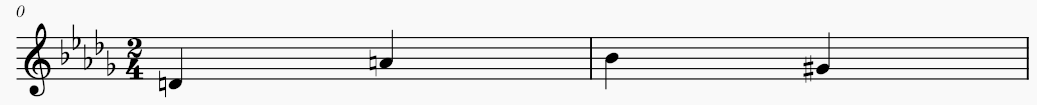

Let's fix these notes so that they fit with the key signature by the *accidentalByStep* routine

In [16]:
ks = m1.keySignature
for n in p.recurse().notes:  # we need to recurse because the notes are in measures...
    nStep = n.pitch.step
    rightAccidental = ks.accidentalByStep(nStep)
    n.pitch.accidental = rightAccidental
p.show('xml')

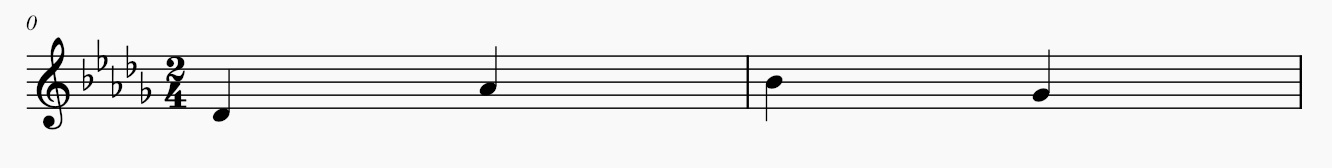

In [17]:
p.transpose(1).show('xml')

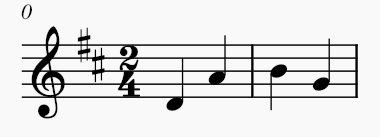

## Key objects

A Key is a lot like a KeySignature, but much more powerful.

In [18]:
# we initialize a Key with a tonic string or Pitch
kD = key.Key('D')
kD

<music21.key.Key of D major>

In [19]:
bFlat = pitch.Pitch('B-')
kBflat = key.Key(bFlat)
kBflat

<music21.key.Key of B- major>

By default, keys are major, but we can make minor keys by specifying ‘minor’ as the second argument

In [20]:
kd = key.Key('D', 'minor')
kd

<music21.key.Key of d minor>

the key is represented as **lowercase**, a clue as to a shortcut for making minor keys

In [21]:
kg = key.Key('g')
kg

<music21.key.Key of g minor>

We can also take KeySignatures and turn them into Keys

In [22]:
(ksEroica.asKey('major'), ksEroica.asKey('minor'))

(<music21.key.Key of E- major>, <music21.key.Key of c minor>)

In [23]:
kg.sharps

-2

In [24]:
kg.alteredPitches

[<music21.pitch.Pitch B->, <music21.pitch.Pitch E->]

In [25]:
kg.mode

'minor'

In [26]:
# They also know their tonic pitches
kg.tonic

<music21.pitch.Pitch G>

**Relative keys(关系调)** have the same key signatures and the same pitches in the scale, but different tonics

In [27]:
kg.relative

<music21.key.Key of B- major>

**Parallel keys(同音主调)** have the same tonic pitch, but use different pitches in the scale

In [28]:
kg.parallel

<music21.key.Key of G major>

 two keys are equal if their modes(调式) and tonics(主音) are the same

In [29]:
kg.relative.relative == kg

True

In [30]:
kg.tonicPitchNameWithCase

'g'

In [31]:
kg.parallel.tonicPitchNameWithCase

'G'

Some analysis routines produce keys

In [32]:
bach = corpus.parse('bwv66.6')
bach.id = 'bach66'
bach.analyze('key')

<music21.key.Key of f# minor>

The key analysis routines algorithm can compute the most possible key(That's not important)

In [33]:
bach.analyze('key.krumhanslschmuckler')

<music21.key.Key of f# minor>

Using plot to look at the key of a piece

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score bach66_flat>>

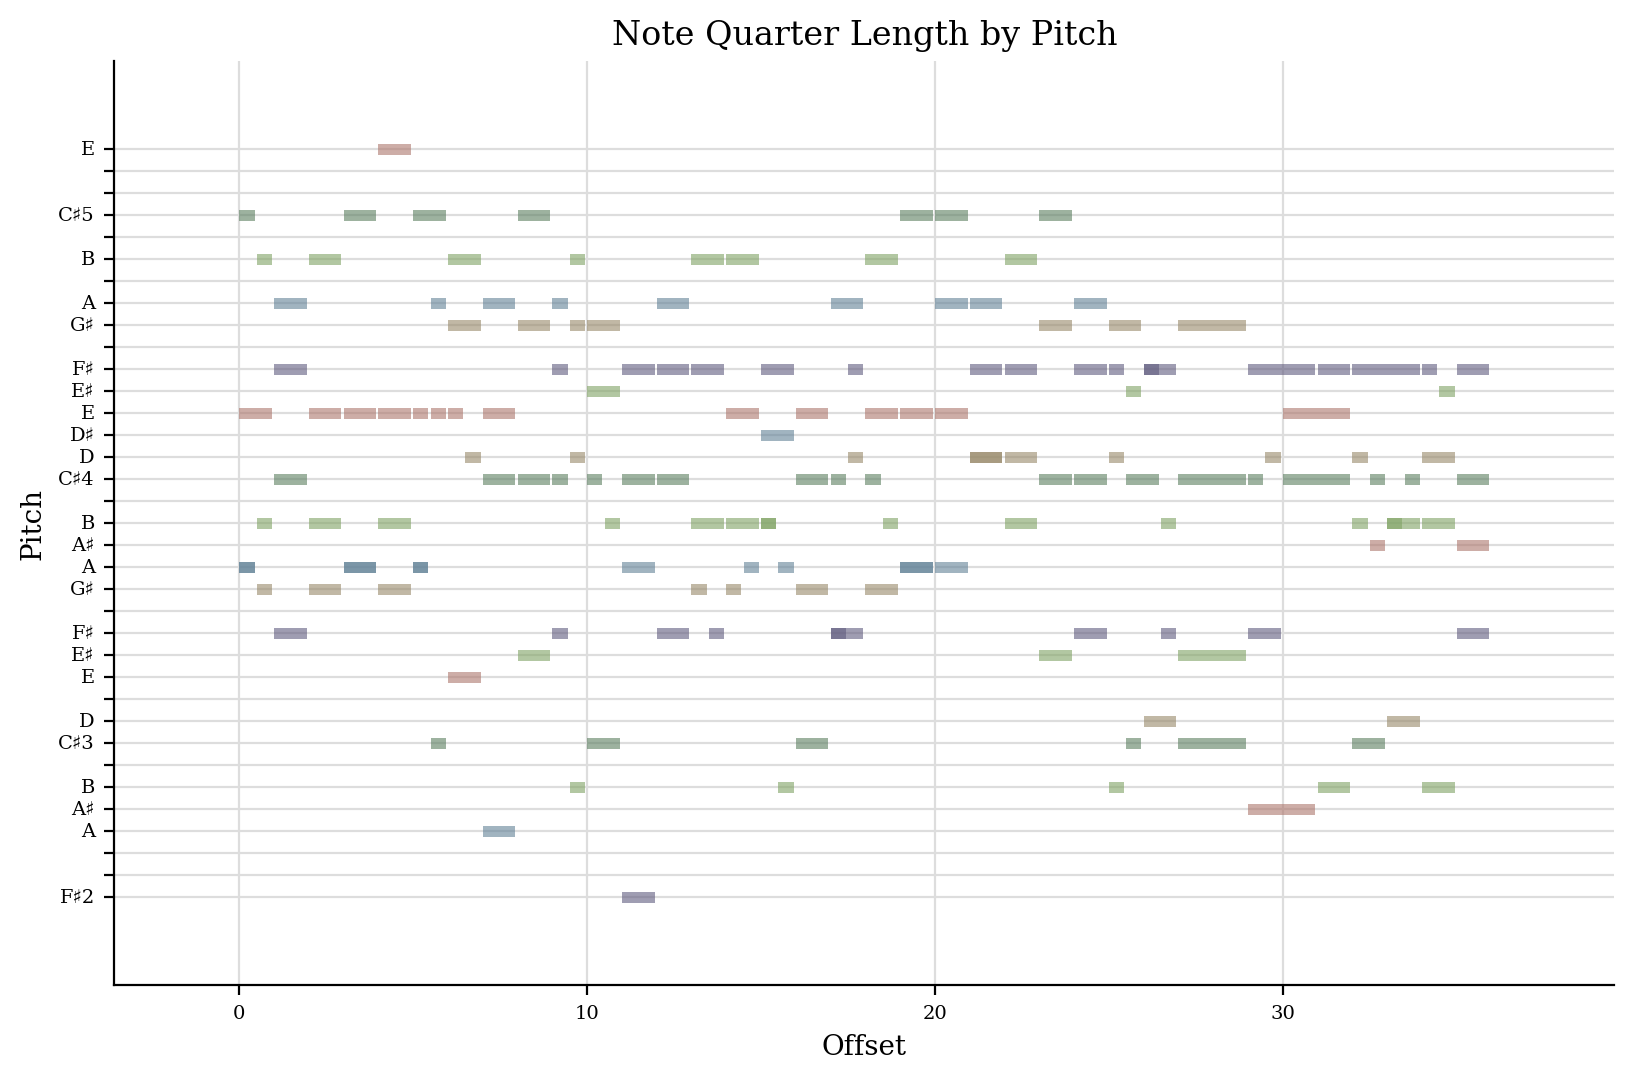

In [34]:
bach.flatten().plot('pianoroll')

A Key object is derived from a KeySignature object and also a Scale object

In [35]:
k = key.Key('E-')
k.classes

('Key',
 'KeySignature',
 'DiatonicScale',
 'ConcreteScale',
 'Scale',
 'Music21Object',
 'ProtoM21Object',
 'object')

## Key Context and Note Spelling

*Key* and *KeySignature* objects affect how notes are spelled in some situations

In [36]:
# set up a simple situation of a F-natural whole note in D major and then B-flat minor
s = stream.Stream()
s.append(key.Key('D'))
s.append(note.Note('F', type='whole'))
s.append(key.Key('b-', 'minor'))
s.append(note.Note('F', type='whole'))
s2 = s.makeNotation()
s2.show('xml')

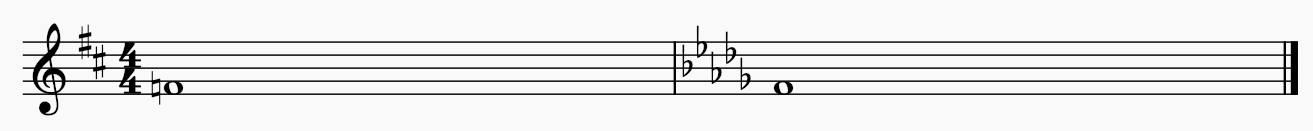

transpose each note up a half step (*n.transpose(1)*)

In [37]:
# the first F-natural should become F-sharp, while the second one will fit better as a G-flat
for n in s2.recurse().notes:
    n.transpose(1, inPlace=True)
s2.show('xml')

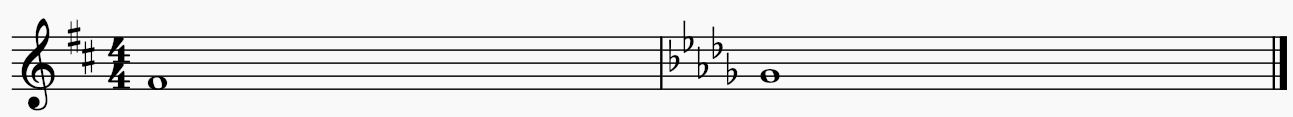

## Example: Prepare a vocal exercise in all major keys, ascending by step

Let’s create a simple exercise in playing or singing thirds

In [38]:
pitchStream = stream.Part()
pitchStream.insert(0, meter.TimeSignature('4/4'))
for step in ('c', 'e', 'd', 'f', 'e', 'g', 'f', 'a',
             'g', 'e', 'f', 'd', 'c', 'e', 'c'):
    n = note.Note(step, type='eighth')
    n.pitch.octave = 4
    pitchStream.append(n)
pitchStream.notes[-1].duration.type = 'quarter'
pitchStream.makeMeasures(inPlace=True)
pitchStream.show('xml')

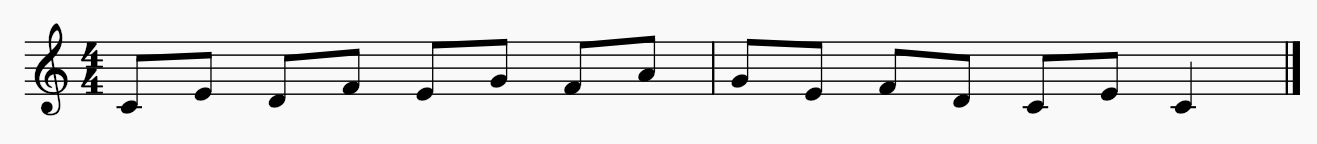

Let’s put a Key of C Major at the beginning of the piece

In [39]:
k = key.Key('C')
pitchStream.measure(1).insert(0, k)
pitchStream.show('xml')

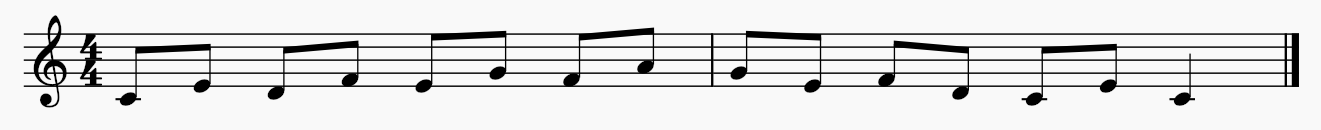

since there are no sharps or flats, it looks like the same as before.

But let's try to **transpose** the *key* object up 1 semitone to D-flat major

In [40]:
k.transpose(1, inPlace=True)
pitchStream.show('xml')

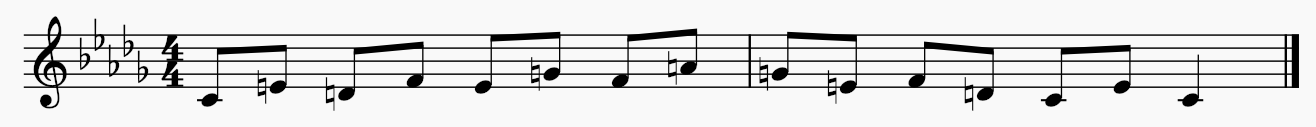

Now the key signature is D-flat, but the notes are **still** in C-major, so we should transpose them also

In [41]:
for n in pitchStream.recurse().notes:
    n.transpose(1, inPlace=True)

pitchStream.show('xml')

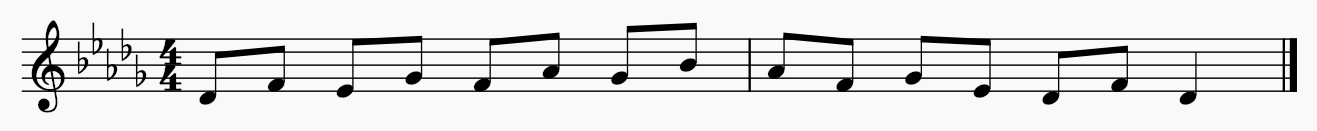

In [42]:
k.transpose(1, inPlace=True)
for n in pitchStream.recurse().notes:
    n.transpose(1, inPlace=True)
pitchStream.show('xml')

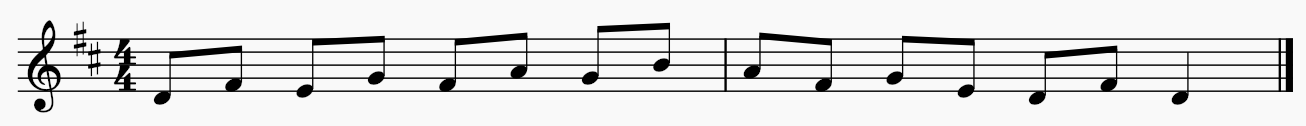

In [43]:
k.transpose(1, inPlace=True)
for n in pitchStream.recurse().notes:
    n.transpose(1, inPlace=True)
pitchStream.show('xml')

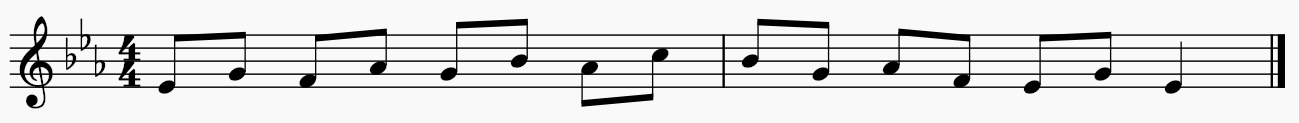

we can make a nice, ascending vocal exercise by varying the **transposition** amount from 0 to 7

and putting each of the two-measure excerpts together into one Part

In [44]:
# the tinyNoatation format will be introduced in the next chapter

out = stream.Part()
for i in range(0, 8):
    pitchStream = converter.parse("tinyNotation: 4/4 c8 e d f e g f a g e f d c e c4")

    if i != 0:
        # remove redundant clefs and time signature
        trebleClef = pitchStream.recurse().getElementsByClass('Clef')[0]
        fourFour = pitchStream.recurse().getElementsByClass('TimeSignature')[0]

        pitchStream.remove(trebleClef, recurse=True)
        pitchStream.remove(fourFour, recurse=True)

    if i % 2 == 0:
        # add a line break at the beginning of every other line:
        pitchStream.measure(1).insert(0, layout.SystemLayout(isNew=True))

    k = key.Key('C')
    pitchStream.measure(1).insert(0, k)
    k.transpose(i, inPlace=True)
    for n in pitchStream.recurse().notes:
        n.transpose(i, inPlace=True)
    for el in pitchStream:
        out.append(el)

out.show('xml')

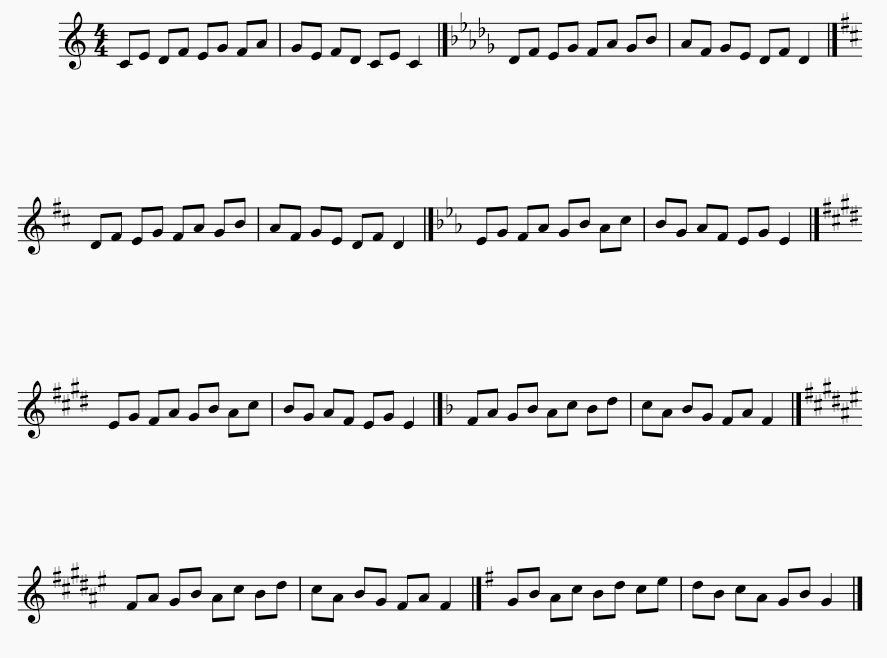

In [45]:
out.show('midi')